# Exercise multi-class classification

In this exercise you are going to download the [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist) dataset directly via TensorFlow. You can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2025-11-04 15:28:45.186778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-04 15:28:45.186849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-04 15:28:45.187667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-04 15:28:45.193973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check the shapes of the data.

In [2]:
# Check the shapes of the data
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


Look at the shape of a single example

In [3]:
# Look at the shape of a single training example
print("Single training example shape:", train_data[0].shape)

# Optionally, also check its label
print("Label:", train_labels[0])

Single training example shape: (28, 28)
Label: 9


You should have discovered 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

Now, plot some random images from the dataset.

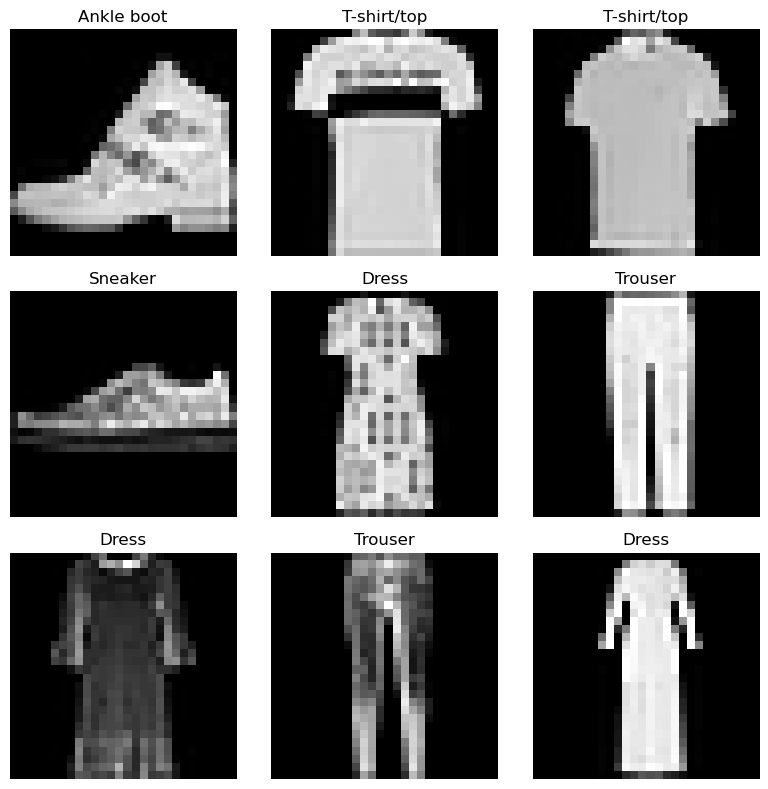

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for better readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 9 random images from the training set
plt.figure(figsize=(8, 8))
for i in range(9):
    index = np.random.randint(0, len(train_data))  # pick a random index
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_data[index], cmap='gray')
    plt.title(class_names[train_labels[index]])
    plt.axis('off')

plt.tight_layout()
plt.show()

Check the random sample's label.

Index: 54176
Numeric label: 4
Class name: Coat


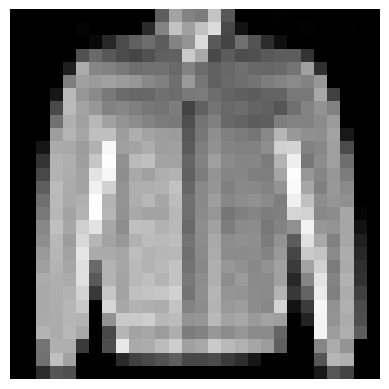

In [5]:
# Pick a random index
index = np.random.randint(0, len(train_data))

# Display the image
plt.imshow(train_data[index], cmap='gray')
plt.axis('off')

# Show the label (numeric + class name)
print("Index:", index)
print("Numeric label:", train_labels[index])

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Class name:", class_names[train_labels[index]])

The labels seem to be in numerical form. This is fine for a neural network, however, we would like some text labels.

Let's create a list of the class names (you can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Determine the output shape.

In [7]:
# Determine the output shape

# Input shape (each image)
print("Input shape (single image):", train_data[0].shape)

# Number of classes (output shape)
num_classes = len(class_names)
print("Number of output classes:", num_classes)

Input shape (single image): (28, 28)
Number of output classes: 10


Create a first model, which you think should be up to the classification job. Train for 10 epochs.

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # Flatten 28x28 images into a 1D vector
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(
    train_data, train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10


2025-11-04 15:28:50.087316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43604 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-11-04 15:28:51.012293: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4b381ecb50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-04 15:28:51.012351: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2025-11-04 15:28:51.018262: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-04 15:28:51.037738: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1762266531.137810 1974884 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at mo

1875/1875 [==============================] - 4s 1ms/step - loss: 2.4037 - accuracy: 0.7067 - val_loss: 0.7011 - val_accuracy: 0.7477
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6285 - accuracy: 0.7750 - val_loss: 0.6625 - val_accuracy: 0.7835
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5621 - accuracy: 0.8045 - val_loss: 0.6160 - val_accuracy: 0.7915
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5375 - accuracy: 0.8160 - val_loss: 0.6193 - val_accuracy: 0.7948
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5184 - accuracy: 0.8234 - val_loss: 0.6228 - val_accuracy: 0.8013
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5146 - accuracy: 0.8253 - val_loss: 0.6087 - val_accuracy: 0.7942
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5042 - accuracy: 0.8292 - val_loss: 0.5208 - val_accuracy: 0.8319
Epo

Have a look at the model summary

In [9]:
# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Try to improve the same model, by passing it normalized data. First normalize the data and then refit the model.

In [10]:
# Check the min and max values of the training data
print("Before normalization:")
print("Min value:", train_data.min())
print("Max value:", train_data.max())

# Normalize the data
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the normalized training data
print("\nAfter normalization:")
print("Min value:", train_data.min())
print("Max value:", train_data.max())

Before normalization:
Min value: 0
Max value: 255

After normalization:
Min value: 0.0
Max value: 1.0


In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_non_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_non_norm.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model on non-normalized data
history_non_normalized = model_non_norm.fit(
    train_data*255,  # use original non-normalized data (pixel values 0-255)
    train_labels,
    epochs=10,
    validation_data=(test_data*255, test_labels)
)

# Fit the model on normalized data
history_normalized = model.fit(
    train_data,  # normalized data
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 3.3981 - accuracy: 0.6899 - val_loss: 0.8026 - val_accuracy: 0.6984
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6964 - accuracy: 0.7373 - val_loss: 0.6817 - val_accuracy: 0.7737
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5624 - accuracy: 0.8034 - val_loss: 0.6195 - val_accuracy: 0.7784
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5208 - accuracy: 0.8212 - val_loss: 0.5696 - val_accuracy: 0.8059
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5174 - accuracy: 0.8261 - val_loss: 0.5892 - val_accuracy: 0.8130
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4841 - accuracy: 0.8337 - val_loss: 0.5700 - val_accuracy: 0.7974
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4875 - accuracy: 0.8353 - val_loss: 0.5592 - val_accuracy:

Plot the non-normalized and normalized accuracy and loss curves.

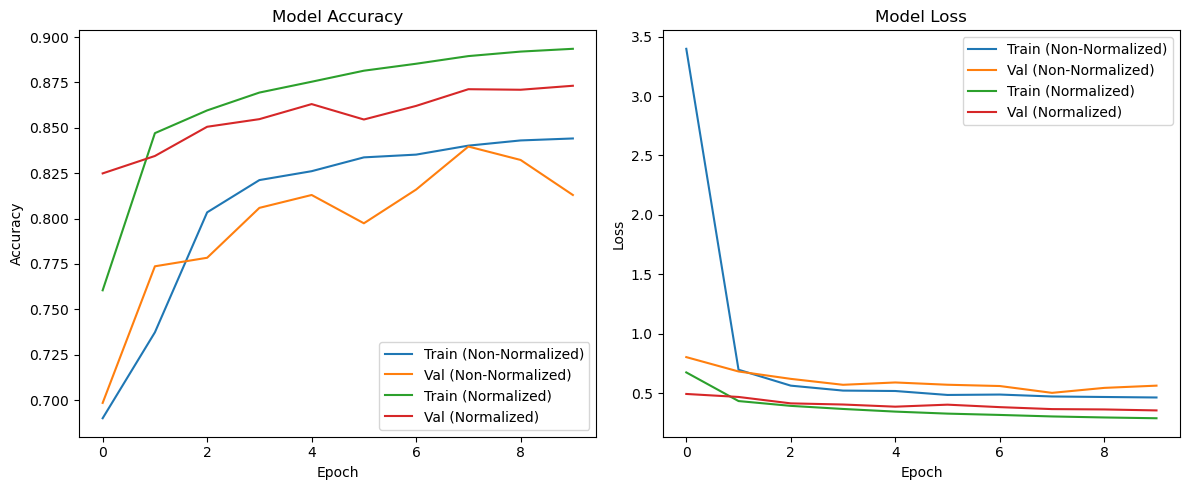

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_non_normalized.history['accuracy'], label='Train (Non-Normalized)')
plt.plot(history_non_normalized.history['val_accuracy'], label='Val (Non-Normalized)')
plt.plot(history_normalized.history['accuracy'], label='Train (Normalized)')
plt.plot(history_normalized.history['val_accuracy'], label='Val (Normalized)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_non_normalized.history['loss'], label='Train (Non-Normalized)')
plt.plot(history_non_normalized.history['val_loss'], label='Val (Non-Normalized)')
plt.plot(history_normalized.history['loss'], label='Train (Normalized)')
plt.plot(history_normalized.history['val_loss'], label='Val (Normalized)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Try to find out the ideal learning rate with `lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))` and train for 40 epochs.

In [13]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # Flatten 28x28 images
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch / 20)  # exponentially increase LR
)

# Fit the model
history_lr = model.fit(
    train_data, train_labels,
    epochs=40,
    validation_data=(test_data, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5001 - accuracy: 0.8252 - val_loss: 0.4220 - val_accuracy: 0.8483 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3775 - accuracy: 0.8637 - val_loss: 0.4719 - val_accuracy: 0.8437 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3437 - accuracy: 0.8755 - val_loss: 0.3783 - val_accuracy: 0.8603 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3222 - accuracy: 0.8816 - val_loss: 0.3916 - val_accuracy: 0.8563 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3081 - accuracy: 0.8859 - val_loss: 0.3911 - val_accuracy: 0.8595 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2977 - accuracy: 0.8887 - val_loss: 0.3772 - val_accuracy: 0.8602 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

In [14]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

NameError: name 'find_lr_history' is not defined

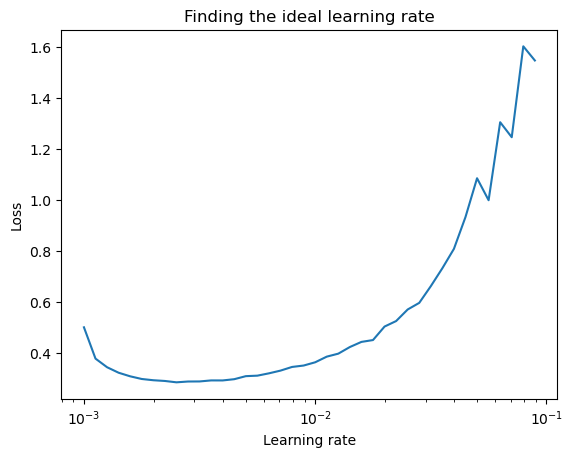

In [15]:
# ALTERNATIVE (to above)
# Learning rates corresponding to each epoch
lrs = 1e-3 * (10**(np.arange(40)/20))

# Plot training loss vs learning rate (x-axis in log scale)
plt.semilogx(lrs, history_lr.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()

Recompile and refit the model using the ideal learning rate and train for 20 epochs.

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # Flatten 28x28 images
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
ideal_lr = 1e-2  # replace with the learning rate you found from the LR plot
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=ideal_lr),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history_final = model.fit(
    train_data, train_labels,
    epochs=20,
    validation_data=(test_data, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5257 - accuracy: 0.8119 - val_loss: 0.4681 - val_accuracy: 0.8340
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4377 - accuracy: 0.8434 - val_loss: 0.4697 - val_accuracy: 0.8428
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4098 - accuracy: 0.8541 - val_loss: 0.4696 - val_accuracy: 0.8273
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3994 - accuracy: 0.8584 - val_loss: 0.4668 - val_accuracy: 0.8390
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3855 - accuracy: 0.8622 - val_loss: 0.4817 - val_accuracy: 0.8406
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3813 - accuracy: 0.8638 - val_loss: 0.4790 - val_accuracy: 0.8329
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3739 - accuracy: 0.8661 - val_loss: 0.4522 - val_accuracy:

Make predictions with the most recent model and the test data.

In [17]:
# Make predictions on the test data
predictions = model.predict(test_data)

# Each prediction is a vector of probabilities for the 10 classes
print("Shape of predictions:", predictions.shape)  # should be (10000, 10)

# Example: predicted class for the first test image
predicted_class = predictions[0].argmax()
print("Predicted class index for first test image:", predicted_class)

# If you have class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Predicted class name:", class_names[predicted_class])
print("Actual class name:", class_names[test_labels[0]])


313/313 [==============================] - 0s 706us/step
Shape of predictions: (10000, 10)
Predicted class index for first test image: 9
Predicted class name: Ankle boot
Actual class name: Ankle boot


Find the highest values of the prediction.

In [18]:
# Get the highest probability for each test sample
max_probs = np.max(predictions, axis=1)

# Example: highest probability for the first 5 test images
for i in range(5):
    print(f"Test image {i}: predicted class = {predictions[i].argmax()}, confidence = {max_probs[i]:.4f}")


Test image 0: predicted class = 9, confidence = 0.9639
Test image 1: predicted class = 2, confidence = 0.9874
Test image 2: predicted class = 1, confidence = 1.0000
Test image 3: predicted class = 1, confidence = 1.0000
Test image 4: predicted class = 6, confidence = 0.9520


Create a confusion matrix

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 1000x1000 with 0 Axes>

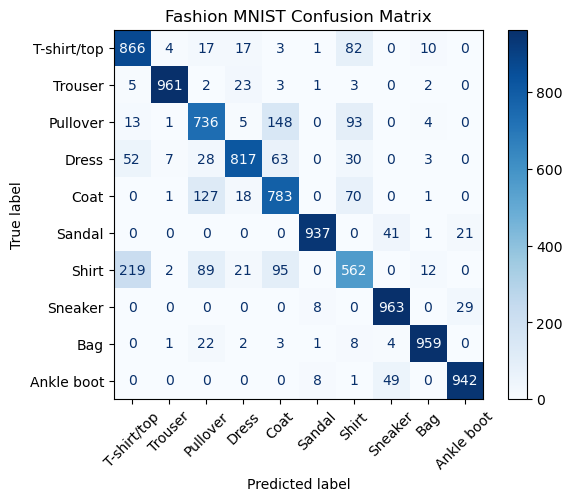

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure predictions exist
# y_pred = np.argmax(predictions, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Fashion MNIST Confusion Matrix")
plt.show()

Which type of clothing is the least recognized?

Answer: Shirt